# **Background**

Due to rising greenhouse gas emissions, major industries are turning to Carbon Capture, Utilization, and Storage (CCUS) strategies as a critical climate solution. To ensure that captured CO₂ remains safely stored underground for the long term, several trapping mechanisms work together to confine it within subsurface formations.

* The first line of defense is **structural and stratigraphic trapping**, where impermeable rock layers, known as caprocks act like geological umbrellas, preventing CO₂ from migrating upward and potentially escaping to the surface.

* As CO₂ moves through the porous rock over time, **residual trapping** comes into play, effectively immobilizing portions of the CO₂ as isolated bubbles trapped within the tiny spaces between rock grains.

* Over longer periods, **solubility trapping** becomes increasingly important as CO₂ gradually dissolves into the naturally occurring brine within the rock formation. This dissolution process reduces the buoyancy of the CO₂, making it less likely to migrate upward.

* Finally, **mineral trapping** represents the most permanent form of storage, where CO₂ undergoes chemical reactions with the surrounding rock to form stable carbonate minerals—essentially turning the gas into stone.

However, there's another critical factor that influences all of these trapping mechanisms: the wettability of mineral surfaces. Wettability, which scientists measure through contact angles formed where brine, CO₂, and mineral surfaces meet, determines how these fluids interact within the rock's pore network. Think of it like how water either beads up on a freshly waxed car or spreads out evenly—minerals can exhibit similar preferences for either CO₂ or brine.

This wettability behavior directly impacts whether CO₂ spreads along mineral surfaces or remains as separate droplets, which in turn affects how much CO₂ can be stored, how effectively it becomes trapped, and how stable the storage system remains over decades or centuries. This is precisely why researchers need to understand and predict contact angles across the wide range of pressure, temperature, salinity, and rock composition conditions found in real underground storage sites.

# Dataset

You will be working with two datasets for this challenge:

* Training Dataset: A synthetic dataset containing 5,000 observations with comprehensive parameter coverage. This dataset includes key variables such as pressure (MPa), temperature (K), salinity (M), mineral type (quartz, calcite, mica, feldspar), contact angle type (static, advancing, receding), and baseline angle (θ₀).


* Testing Dataset: A real-world dataset comprising 630 observations collected from literature. This dataset will serve as the benchmark for evaluating your model's performance on real-world experimental conditions, providing a test of how well your approach generalizes from synthetic training data to real-world scenarios.

# Algorithm

We encourage participants to explore and experiment with any machine learning approach they find suitable for this challenge. Whether you prefer traditional machine learning algorithms like random forests, support vector machines, or gradient boosting methods, or you're interested in implementing deep learning architectures such as neural networks, convolutional networks, or more advanced models; all approaches are welcome.

# Metrics


$$
AARE(\%) = \frac{1}{N} \sum_{i=1}^{N} \left| \frac{\theta_i^{pred} - \theta_i^{exp}}{\theta_i^{exp}} \right| \times 100
$$



$$
RMSE = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} \left( \theta_i^{pred} - \theta_i^{exp} \right)^2 }
$$




$$
R = \frac{\sum_{i=1}^{N} \left( \theta_i^{exp} - \overline{\theta^{exp}} \right)\left( \theta_i^{pred} - \overline{\theta^{pred}} \right)}
{\sqrt{\sum_{i=1}^{N} \left( \theta_i^{exp} - \overline{\theta^{exp}} \right)^2 \cdot \sum_{i=1}^{N} \left( \theta_i^{pred} - \overline{\theta^{pred}} \right)^2}}
$$


Lower AARE values indicate better model performance, with 0% representing perfect predictions. The winning models will be those that achieve the lowest AARE on the real-world testing dataset.

#### **References**

Daryasafar, A., Keykhosravi, A., & Shahbazi, K. (2019). Modeling CO2 wettability behavior at the interface of brine/CO2/mineral: Application to CO2 geo-sequestration. Journal of Cleaner Production, 239, 118101.



## Data exploration

In [1]:
%pip install "numpy<2"

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import pandas as pd

#Load train
train = pd.read_csv("Train.csv")
train = train.sort_values(by=['mineral','contact_type', 'theta0']).reset_index(drop=True)

#load test
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,pressure,temperature,salinity,mineral,contact_type,theta0,contact_angle
0,32.868251,309.009477,3.117627,calcite,adv,0,47.496677
1,12.635066,341.108698,0.247334,calcite,adv,0,56.622521
2,28.776101,324.380597,3.643516,calcite,adv,0,42.643842
3,38.418634,300.006464,1.058658,calcite,adv,0,35.274289
4,27.408971,320.644919,5.662101,calcite,adv,0,46.468174


In [4]:
test.head()

,pressure,temperature,salinity,mineral,contact_type,theta0
0,2.98870,298.0,0.0,quartz,st,3
1,3.97740,298.0,0.0,quartz,st,3
2,5.00565,298.0,0.0,quartz,st,3
3,5.99435,298.0,0.0,quartz,st,3
4,6.98305,298.0,0.0,quartz,st,3


In [5]:
#check for empty values
train.isna().sum()

pressure         0
temperature      0
salinity         0
mineral          0
contact_type     0
theta0           0
contact_angle    0
dtype: int64

In [6]:
test.isnull().sum()

pressure        0
temperature     0
salinity        0
mineral         0
contact_type    0
theta0          0
dtype: int64

In [7]:
#check data types
train.dtypes

pressure         float64
temperature      float64
salinity         float64
mineral           object
contact_type      object
theta0             int64
contact_angle    float64
dtype: object

# Data visualization

C:\Users\Ahaji Kelechi\AppData\Local\Temp\ipykernel_9684\2697304484.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


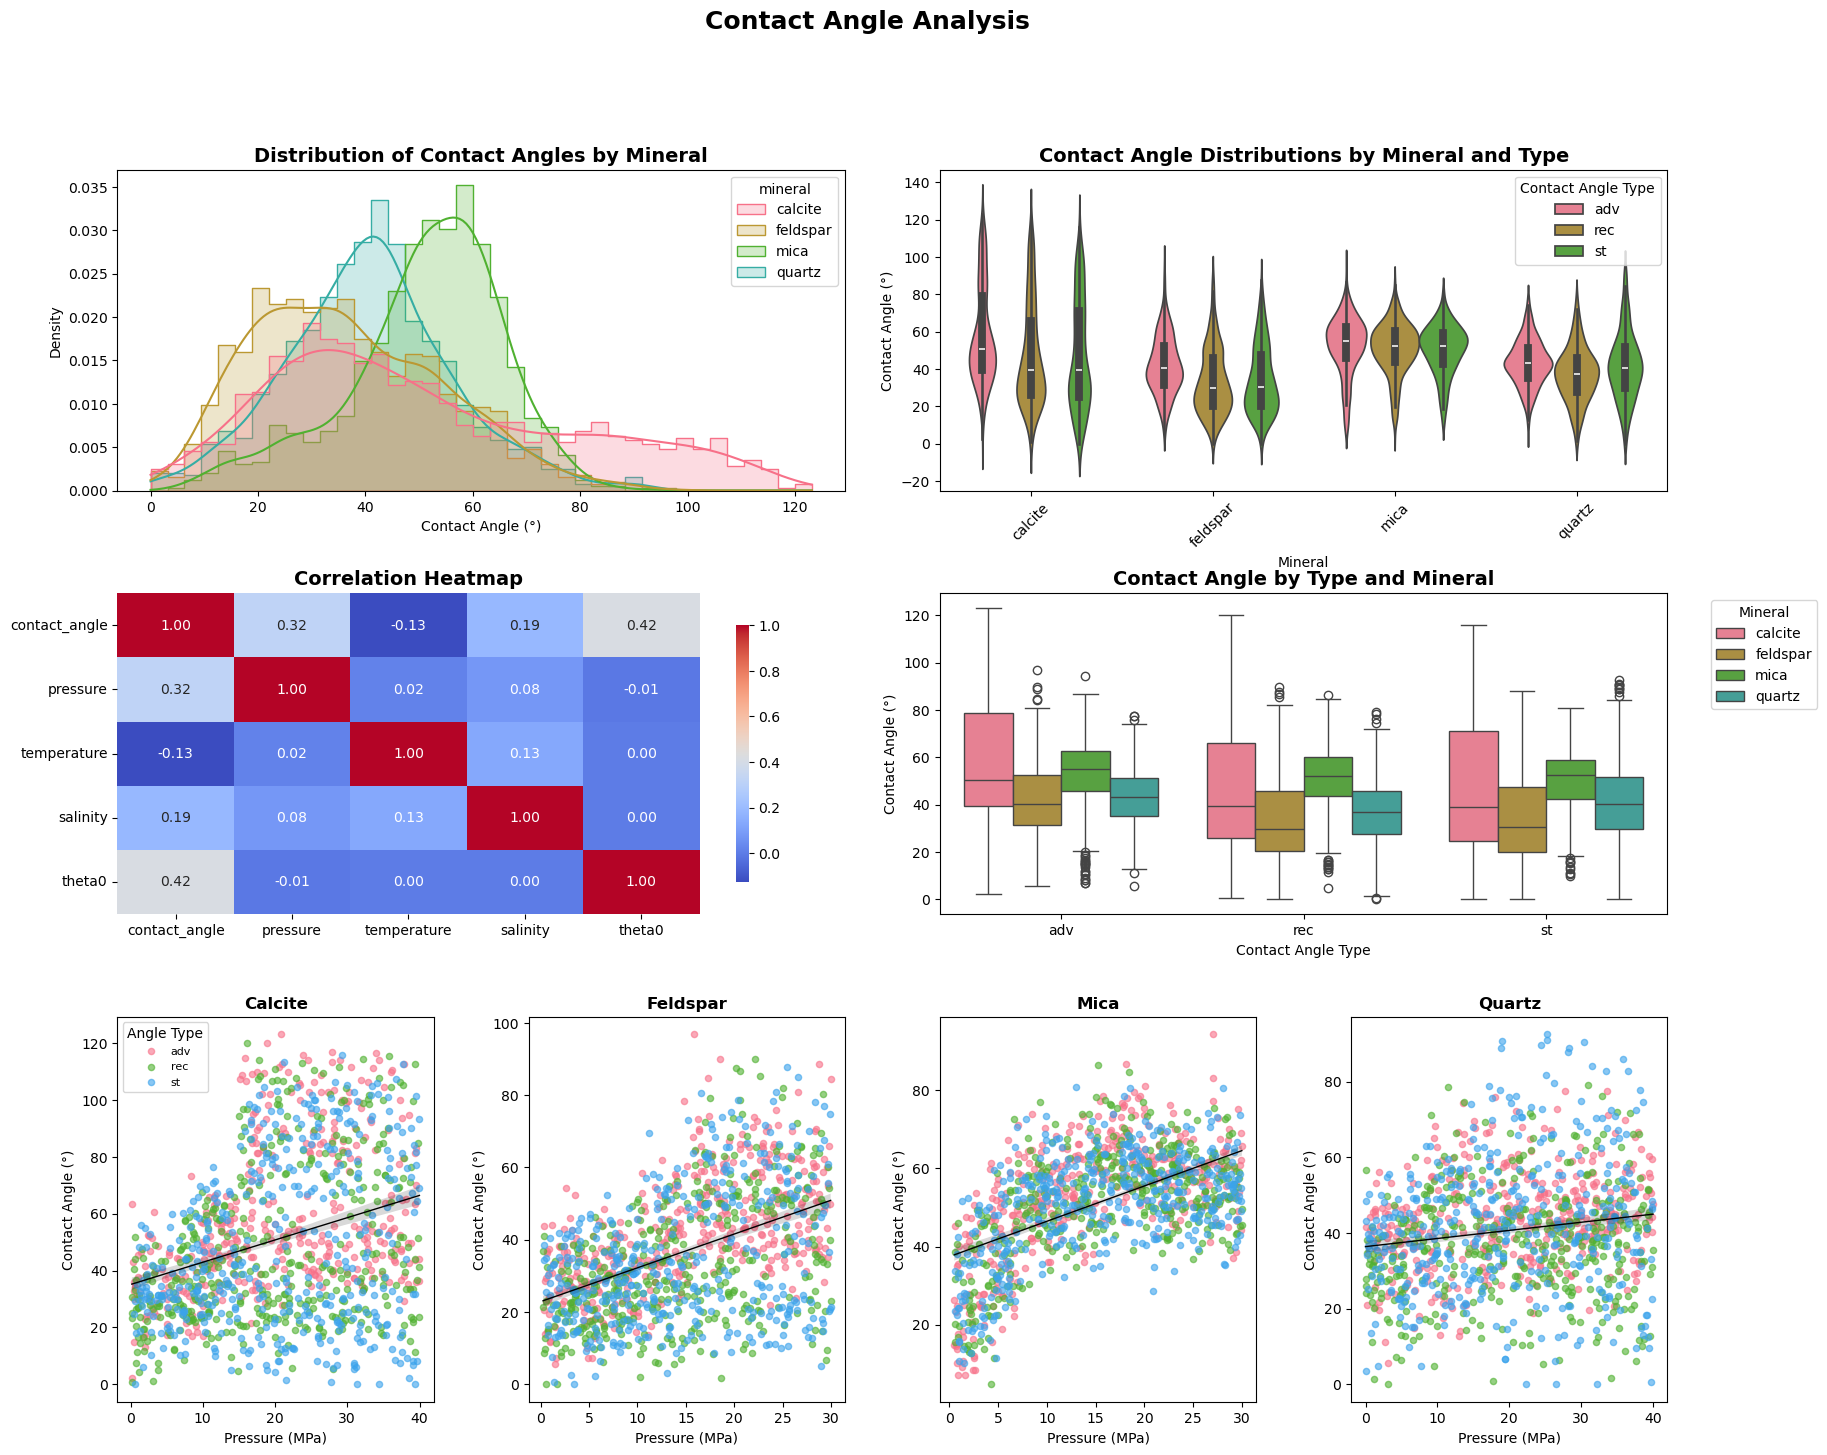

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('default')
sns.set_palette("husl")


fig = plt.figure(figsize=(20, 16))

# a grid layout
gs = fig.add_gridspec(3, 4, height_ratios=[1, 1, 1.2], width_ratios=[1, 1, 1, 1],
                      hspace=0.3, wspace=0.3)

# -----------------------------
# Distribution plots per mineral
# -----------------------------
ax1 = fig.add_subplot(gs[0, :2])
sns.histplot(data=train, x="contact_angle", hue="mineral", kde=True,
             element="step", stat="density", common_norm=False, ax=ax1)
ax1.set_title("Distribution of Contact Angles by Mineral", fontsize=14, fontweight='bold')
ax1.set_xlabel("Contact Angle (°)")
ax1.set_ylabel("Density")
# ax1.legend(title="Mineral", loc='upper right')

# -----------------------------
# Violin plots by mineral and CA type
# -----------------------------
ax2 = fig.add_subplot(gs[0, 2:])
sns.violinplot(data=train, x="mineral", y="contact_angle", hue="contact_type",
               split=False, ax=ax2)
ax2.set_title("Contact Angle Distributions by Mineral and Type", fontsize=14, fontweight='bold')
ax2.set_xlabel("Mineral")
ax2.set_ylabel("Contact Angle (°)")
ax2.legend(title="Contact Angle Type", loc='upper right')
plt.setp(ax2.get_xticklabels(), rotation=45)

# -----------------------------
# 3. Correlation heatmap
# -----------------------------
ax3 = fig.add_subplot(gs[1, :2])
corr = train[["contact_angle", "pressure", "temperature", "salinity", "theta0"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=ax3,
            cbar_kws={'shrink': 0.8})
ax3.set_title("Correlation Heatmap", fontsize=14, fontweight='bold')

# -----------------------------
# Box plots by angle type
# -----------------------------
ax4 = fig.add_subplot(gs[1, 2:])
sns.boxplot(data=train, x="contact_type", y="contact_angle", hue="mineral", ax=ax4)
ax4.set_title("Contact Angle by Type and Mineral", fontsize=14, fontweight='bold')
ax4.set_xlabel("Contact Angle Type")
ax4.set_ylabel("Contact Angle (°)")
ax4.legend(title="Mineral", bbox_to_anchor=(1.05, 1), loc='upper left')

# -----------------------------
# 5. Scatterplot
# -----------------------------
minerals = train['mineral'].unique()
colors = sns.color_palette("husl", n_colors=len(train['contact_type'].unique()))
angle_types = train['contact_type'].unique()

for i, mineral in enumerate(minerals):
    ax = fig.add_subplot(gs[2, i])
    mineral_data = train[train['mineral'] == mineral]

    for j, angle_type in enumerate(angle_types):
        type_data = mineral_data[mineral_data['contact_type'] == angle_type]
        ax.scatter(type_data['pressure'], type_data['contact_angle'],
                  alpha=0.6, s=20, label=angle_type, color=colors[j])

    # Add trend line
    sns.regplot(data=mineral_data, x='pressure', y='contact_angle',
                scatter=False, ax=ax, color='black', line_kws={'linewidth': 1})

    ax.set_title(f'{mineral.capitalize()}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Pressure (MPa)')
    ax.set_ylabel('Contact Angle (°)')

    if i == 0:  # Only show legend for first subplot
        ax.legend(title='Angle Type', fontsize=8)

fig.suptitle('Contact Angle Analysis', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()



# Model training

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#encode catgorical variables
train_encoded = pd.get_dummies(train, columns=['mineral', 'contact_type'], drop_first=True)
test_encoded = pd.get_dummies(test, columns=['mineral', 'contact_type'], drop_first=True)


#split features and target
X_train = train_encoded.drop(['contact_angle'], axis=1)
y_train = train_encoded['contact_angle']

X_test = test_encoded

#split train into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                                  random_state=42)


In [10]:
#train model

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)



In [11]:
#performance on validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print(f"Validation MSE: {mse_val:.4f}, MAE: {mae_val:.4f}, R2: {r2_val:.4f}")

Validation MSE: 61.3630, MAE: 6.2139, R2: 0.8566


In [12]:
# mcalculate mape
import numpy as np

mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
print(f"Validation MAPE: {mape:.2f}%")

Validation MAPE: 27.15%


In [15]:
import numpy as np

def metrics(y_exp, y_pred):
    y_exp = np.array(y_exp, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    N = len(y_exp)

    # AARE (%)
    AARE = (np.sum(np.abs((y_pred - y_exp) / y_exp)) / N) * 100

    # RMSE
    RMSE = np.sqrt(np.sum((y_pred - y_exp) ** 2) / N)

    # Correlation coefficient (R)
    numerator = np.sum((y_exp - np.mean(y_exp)) * (y_pred - np.mean(y_pred)))
    denominator = np.sqrt(np.sum((y_exp - np.mean(y_exp)) ** 2) * np.sum((y_pred - np.mean(y_pred)) ** 2))
    R = numerator / denominator

    return AARE, RMSE, R

AARE, RMSE, R = metrics(y_val, y_pred_val)
print(f"AARE (%) = {AARE:.4f}")
print(f"RMSE = {RMSE:.4f}")
print(f"R = {R:.4f}")


AARE (%) = 27.1502
RMSE = 7.8335
R = 0.9260


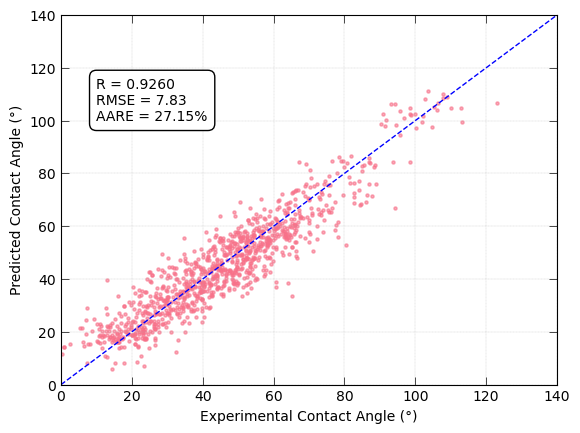

In [16]:
#visualize
import matplotlib.pyplot as plt


plt.scatter(y_val, y_pred_val, alpha=0.6, s=5)
plt.plot([0, 140], [0, 140], 'b--', lw=1)
plt.grid(True, which='both', linestyle='--', linewidth=0.2)
plt.tick_params(axis='both', which='both', direction='in',
                length=6, width=0.5, top=True, right=True)
plt.xlabel('Experimental Contact Angle (°)')
plt.ylabel('Predicted Contact Angle (°)')
# plt.title('Predicted vs Experimental Contact Angle')
plt.text(10, 100, f'R = {R:.4f}\nRMSE = {RMSE:.2f}\nAARE = {AARE:.2f}%', fontsize=10,
          bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5))
plt.xlim(0, 140)
plt.ylim(0, 140)
plt.show()

In [ ]:
Submission = pd.DataFrame({
    "id": test.index,
    "contact_angle": y_pred_test
})
Submission.to_csv("Team_alpha.csv", index=False)

In [ ]:
Submission.head()